# Portfolio Optimization

Portfolio Optimization is the process of selecting the best portfolio out of the set of portfolios being considered according to some objective. The objective typically maximizes factors such as:
- Expected returns, and
- Minimizes cost like financial risk

The goal is to find the optimal combination of assets that will provide the highest expected return for a given level of risk or the lowest risk for a given level of return.

The optimization process involves selecting a set of assets and determining the optimal allocation of funds to each asset. This requires analyzing historical market data, assessing the risk and return of each asset, and considering how the assets might perform under different market conditions.

Portfolio optimization is an important tool for investors who want to achieve a specific investment goal, such as maximizing their returns or minimizing their risk. It is commonly used by fund managers, financial advisors, and individual investors to construct investment portfolios that meet their specific needs and objectives.

### Data Description

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import pandas_datareader as pdr
from pandas_datareader import data as web # to scrape data from yahoo finance
from datetime import datetime

pd.options.display.max_columns = None   # so that we can see all columns by scrolling

c:\ProgramDataAnaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Getting the stock symbols/tickers
- Meta(Facebook)
- Netflix
- Google
- AMD


# Using yfinance and pandas-datareader

# Using yfinance

https://www.alpharithms.com/python-financial-data-491110/

In [2]:
import yfinance as yf

In [3]:
# Request historical data for past 8 years
data = yf.Ticker("AMD").history(period='8y')

In [5]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-03-02 00:00:00-05:00,3.13,3.23,3.11,3.21,15638100,0.0,0.0
2015-03-03 00:00:00-05:00,3.20,3.23,3.13,3.14,8644000,0.0,0.0
2015-03-04 00:00:00-05:00,3.14,3.14,3.01,3.05,12122100,0.0,0.0
2015-03-05 00:00:00-05:00,3.10,3.10,2.98,2.98,11472300,0.0,0.0
2015-03-06 00:00:00-05:00,2.96,2.99,2.83,2.92,16785200,0.0,0.0


### META (Facebook)

In [6]:
data2 = yf.Ticker("META").history(period='8y')   # META = Facebook

In [7]:
data2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-03-02 00:00:00-05:00,79.000000,79.860001,78.519997,79.750000,21662500,0.0,0.0
2015-03-03 00:00:00-05:00,79.610001,79.699997,78.519997,79.599998,18635000,0.0,0.0
2015-03-04 00:00:00-05:00,79.300003,81.150002,78.849998,80.900002,28126700,0.0,0.0
2015-03-05 00:00:00-05:00,81.230003,81.989998,81.050003,81.209999,27825700,0.0,0.0
2015-03-06 00:00:00-05:00,80.900002,81.330002,79.830002,80.010002,24488600,0.0,0.0


### Netflix

In [8]:
data3 = yf.Ticker("NFLX").history(period='8y')

In [9]:
data3.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-03-02 00:00:00-05:00,67.714287,68.607140,67.234283,68.607140,10187100,0.0,0.0
2015-03-03 00:00:00-05:00,68.344284,68.457146,67.507141,67.815712,7426300,0.0,0.0
2015-03-04 00:00:00-05:00,67.529999,67.925713,66.182854,67.110001,17453800,0.0,0.0
2015-03-05 00:00:00-05:00,67.428574,67.464287,66.419998,66.807144,11244800,0.0,0.0
2015-03-06 00:00:00-05:00,66.642860,66.925713,64.844284,64.874283,12888400,0.0,0.0


In [11]:
data4 = yf.Ticker("AAPL").history(period='8y')
data4.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-03-02 00:00:00-05:00,29.156196,29.388543,28.941895,29.120102,192386800,0.0,0.0
2015-03-03 00:00:00-05:00,29.090783,29.217107,28.894526,29.181013,151265200,0.0,0.0
2015-03-04 00:00:00-05:00,29.122360,29.226125,28.946408,28.996033,126665200,0.0,0.0
2015-03-05 00:00:00-05:00,29.005060,29.043409,28.368925,28.515553,226068400,0.0,0.0
2015-03-06 00:00:00-05:00,28.964453,29.183266,28.481714,28.558411,291368400,0.0,0.0


In [12]:
data5 = yf.Ticker("GOOG").history(period='8y')
data5.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-03-02 00:00:00-05:00,27.949764,28.529173,27.861008,28.488785,42592618,0.0,0.0
2015-03-03 00:00:00-05:00,28.444407,28.690729,28.248444,28.603470,34095352,0.0,0.0
2015-03-04 00:00:00-05:00,28.515211,28.776493,28.322741,28.590006,37536775,0.0,0.0
2015-03-05 00:00:00-05:00,28.672279,28.816385,28.592001,28.687738,27792094,0.0,0.0
2015-03-06 00:00:00-05:00,28.665298,28.755053,28.260410,28.306534,33182854,0.0,0.0


### Dropping unnecessary columns
We only need the 'Close' price column for each stock

In [13]:
data = data.drop(columns=['Open','High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)
data2 = data2.drop(columns=['Open','High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)
data3 = data3.drop(columns=['Open','High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)
data4 = data4.drop(columns=['Open','High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)
data5 = data5.drop(columns=['Open','High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1)

In [15]:
data_data2 = pd.merge(data,data2, on="Date")

In [16]:
data_data2.head()

,Close_x,Close_y
Date,,
2015-03-02 00:00:00-05:00,3.21,79.750000
2015-03-03 00:00:00-05:00,3.14,79.599998
2015-03-04 00:00:00-05:00,3.05,80.900002
2015-03-05 00:00:00-05:00,2.98,81.209999
2015-03-06 00:00:00-05:00,2.92,80.010002


In [17]:
data_data2_data3 = pd.merge(data_data2,data3, on="Date")

In [18]:
data_data2_data3_data4 = pd.merge(data_data2_data3,data4, on="Date")

In [ ]:
data_data2_data3_data4 = pd.merge(data_data2_data3,data4, on="Date")

In [20]:
final_df = pd.merge(data_data2_data3_data4,data5, on="Date")

In [21]:
final_df.head()

,Close_x,Close_y,Close_x,Close_y,Close
Date,,,,,
2015-03-02 00:00:00-05:00,3.21,79.750000,68.607140,29.120102,28.488785
2015-03-03 00:00:00-05:00,3.14,79.599998,67.815712,29.181013,28.603470
2015-03-04 00:00:00-05:00,3.05,80.900002,67.110001,28.996033,28.590006
2015-03-05 00:00:00-05:00,2.98,81.209999,66.807144,28.515553,28.687738
2015-03-06 00:00:00-05:00,2.92,80.010002,64.874283,28.558411,28.306534


### Renaming the columns to something more readable

In [22]:
final_df = final_df.rename(columns={'Close_x': 'AMD', 'Close_y': 'META', 'Close_x': 'NFLX',  'Close_y': 'AAPL',  'Close': 'GOOG'})

In [23]:
final_df.head()

,NFLX,AAPL,NFLX,AAPL,GOOG
Date,,,,,
2015-03-02 00:00:00-05:00,3.21,79.750000,68.607140,29.120102,28.488785
2015-03-03 00:00:00-05:00,3.14,79.599998,67.815712,29.181013,28.603470
2015-03-04 00:00:00-05:00,3.05,80.900002,67.110001,28.996033,28.590006
2015-03-05 00:00:00-05:00,2.98,81.209999,66.807144,28.515553,28.687738
2015-03-06 00:00:00-05:00,2.92,80.010002,64.874283,28.558411,28.306534


### Visualizing the Stocks/Portfolio

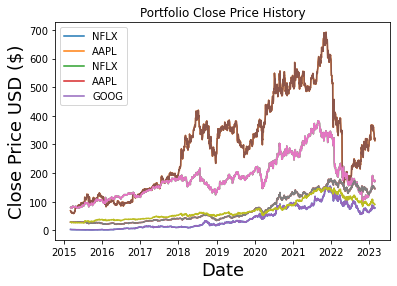

In [24]:
# Visually show the stock/ portfolio
title = 'Portfolio Close Price History'

# Get the stocks
my_stocks = final_df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)   # column name is c, label = name of the column

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

From above, it is noted that the most expensive stock is , and the least expensive is AMD.

### show the daily simple return for each stock and storing it in a new dataframe

In [25]:
returns = final_df.pct_change()
returns

,NFLX,AAPL,NFLX,AAPL,GOOG
Date,,,,,
2015-03-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2015-03-03 00:00:00-05:00,-0.021807,-0.001881,-0.011536,0.002092,0.004026
2015-03-04 00:00:00-05:00,-0.028662,0.016332,-0.010406,-0.006339,-0.000471
2015-03-05 00:00:00-05:00,-0.022951,0.003832,-0.004513,-0.016571,0.003418
2015-03-06 00:00:00-05:00,-0.020134,-0.014776,-0.028932,0.001503,-0.013288
...,...,...,...,...,...
2023-02-23 00:00:00-05:00,0.040987,0.005376,-0.033534,0.003291,-0.007952
2023-02-24 00:00:00-05:00,-0.020815,-0.009591,-0.020083,-0.018005,-0.018887
2023-02-27 00:00:00-05:00,0.008708,-0.004989,0.018540,0.008248,0.008394


NB: Returns = New price / (old price -1)

### Creating and showing the annualized covariance matrix
This is a statistical concept that shows how much 2 random variables vary or move together. It shows the relationship

In [26]:
cov_matrix_annual = returns.cov()*252  # 252 = no. of trading days per year
cov_matrix_annual

,NFLX,AAPL,NFLX,AAPL,GOOG
NFLX,0.371825,0.082380,0.093274,0.079962,0.068268
AAPL,0.082380,0.146758,0.082811,0.063498,0.072986
NFLX,0.093274,0.082811,0.206683,0.058915,0.062692
AAPL,0.079962,0.063498,0.058915,0.089194,0.055261
GOOG,0.068268,0.072986,0.062692,0.055261,0.082630


From above, on the diagonal we have the variance. And the rest of the entries are co-variance. If we take the square root of the variance, we get the volatility.

If the co-variance is positive, the stock prices move together, when one increases, the other increases.

### Calculating the portfolio variance
Weights(transposed) x covariance matrix x weights

In [28]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [29]:
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.09348733705729874

### Calculate the portfolio volatility(standard deviation)

In [30]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.3057569902018574

### Calculating the annual portfolio return
We sum the average of the returns by weights

In [31]:
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.2960503843065948

### Showing the expected annual return, volatility (risk), and the variance

In [32]:
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expected annual return: 30.0%
Annual volatility/risk: 31.0%
Annual variance: 9.0%


For this portfolio and the current weights that we have(33.33% for each of the stocks), we get an annual expected return of 35%, and 37% risk, and the annual variance is 14%.

Let's try to get a higher return for a lower risk.


In [113]:
# pip install PyPortfolioOpt

In [33]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

### Portfolio Optimization

In [34]:
# Calculate the expected returns and the annualized sample 
# covariance matrix of asset returns
mu = expected_returns.mean_historical_return(final_df)   # mean
S = risk_models.sample_cov(final_df)   # sample covariance matrix

# Optimize for maximum sharpe ratio - how much excess return you recieve 
# for some amount of volatility. It measures the performance of an investment
# compared to an investment that is risk free such as bond, treasure bills
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))   # create ef object
ef.add_constraint(lambda w: w[0]+w[1]+w[2] == 1)
weights = ef.max_sharpe()  # maximize sharp ratio and get raw weights
cleaned_weights = ef.clean_weights() # helper method to clean the raw weights, it sets any weights whose abs values are below its cutoff. In this one, the cutoff is defaulted, but we may change this.
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('NFLX', 0.39425), ('AAPL', 0.61953), ('GOOG', -0.61953)])
Expected annual return: 52.3%
Annual volatility: 60.6%
Sharpe Ratio: 0.83


(0.5227745920543827, 0.6060780686435274, 0.8295541747281009)

From above, if there is a stock with 0.0, that would mean that we wouldn't need it. The numbers should ideally be summed to 1. 0.923 and 0.4016 should be equal to 1, sometimes might be off because the roundings.

### So according to the package, these are the best portfolio according to the stocks we have inputted.

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 50000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
plotting.plot_efficient_frontier(ef)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)




In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
# 100 portfolios with risks between 0.10 and 0.30
risk_range = np.linspace(0.30, 0.80, 1000)
plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,show_assets=True, showfig=True)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


In [ ]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()